In [1]:
import Main as gen
import pandas as pd
import matplotlib.pyplot as plt
import re
import importlib
from configparser import ConfigParser, ExtendedInterpolation


In [6]:

configParser = ConfigParser(interpolation=ExtendedInterpolation())
# TODO - Change this to updated path each excercise
configParser.read("past_configs/2023a_ex4_config.ini")

wdir = configParser["paths"]["out_path"]
# fix this sheet
wdir = "/home/guysh/worksToCheck/outputs"
print(wdir)
EX_NUM = configParser["misc"]["EX_NUM"]
SEMESTER = configParser["misc"]["SEMESTER"]
print(EX_NUM)
print(SEMESTER)

/home/guysh/worksToCheck/outputs
4
2023a


## Summarize the pattern of mistakes, which occurred a lot 

In [13]:
err_df = pd.read_csv(f'{wdir}/ex{EX_NUM}_err_df_extended.csv', index_col = 0)
err_df = err_df.drop(['stud_name'], axis = 1)
print("err_df shape:", err_df.shape)

try:
    err_df_recheck = pd.read_csv(f'{wdir}/ex{EX_NUM}_recheck_err_df_extended.csv', index_col = 0)
    err_df_recheck = err_df_recheck.drop(['stud_name'], axis = 1)
    print("Imported rechecks, rechecks df shape:", err_df_recheck.shape)
except:
    err_df_recheck = None
    
err_df_merged = pd.concat([err_df, err_df_recheck], sort=True).drop_duplicates(['stud_id'],keep='last')
#print("err_df_merged shape: ",err_df_merged)
# err_df_merged['RE']


err_df shape: (155, 43)
err_df_merged shape:        A1  A1X   A2  A2X   A3  A3X AImp   B1  B1X  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   
150  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
151  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
152  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
153  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
154  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                    B2  ... DImp   E0   E1  \
0                                                  NaN  ...  NaN  NaN  NaN   
1                                                  NaN  ...  NaN  NaN  NaN   
2                                                  NaN  ...  NaN  NaN  NaN   
3    {'Wrong answ

### Melt all err codes to long form to gather them and make statistics

In [14]:
cols = list(err_df_merged.columns)
cols.remove('stud_id')
err_df_longform = err_df_merged.melt(id_vars= 'stud_id', value_vars = cols,  var_name = 'err_code')
#.drop('err_code', axis = 1).rename({'value':'err_code'}, axis =1)
print(err_df_longform.shape)
err_df_longform = err_df_longform.dropna()
print(err_df_longform.shape)


(6510, 3)
(425, 3)


Remove cells with OK as they are not mistakes

In [15]:
mask = err_df_longform.err_code == 'OK'
err_df_longform = err_df_longform[~mask]
print(err_df_longform.shape)
mask = err_df_longform.err_code == 'Imp'
err_df_longform[mask]
# err_df_longform = err_df_longform[~mask]
print(err_df_longform[mask].shape)

(372, 3)
(8, 3)


In [121]:
# err_df_longform.loc[err_df_longform.err_code == 'A5'].value.iloc[0]

In [16]:
def err_to_QNum(err_code):
    '''
    Helper fucntion to map from err codes to the questions they originate from
    Helps to understand how many errors there are for each question
    '''
    QNum_dict = {'A': 1, 'B': 2, 'C':3, 'D':4, 'E': 5, 'F':6, 'I':'Import', 'R':'Recheck',}
#     print(err_code)
    try:
        if err_code in ['RE', 'Imp']:
            return err_code
        
        return QNum_dict[err_code[0]]
    
    except:
        print(err_code)
        print(QNum_dict[err_code[0]])

Map errors to questions numbers and report the amount of errors per questions

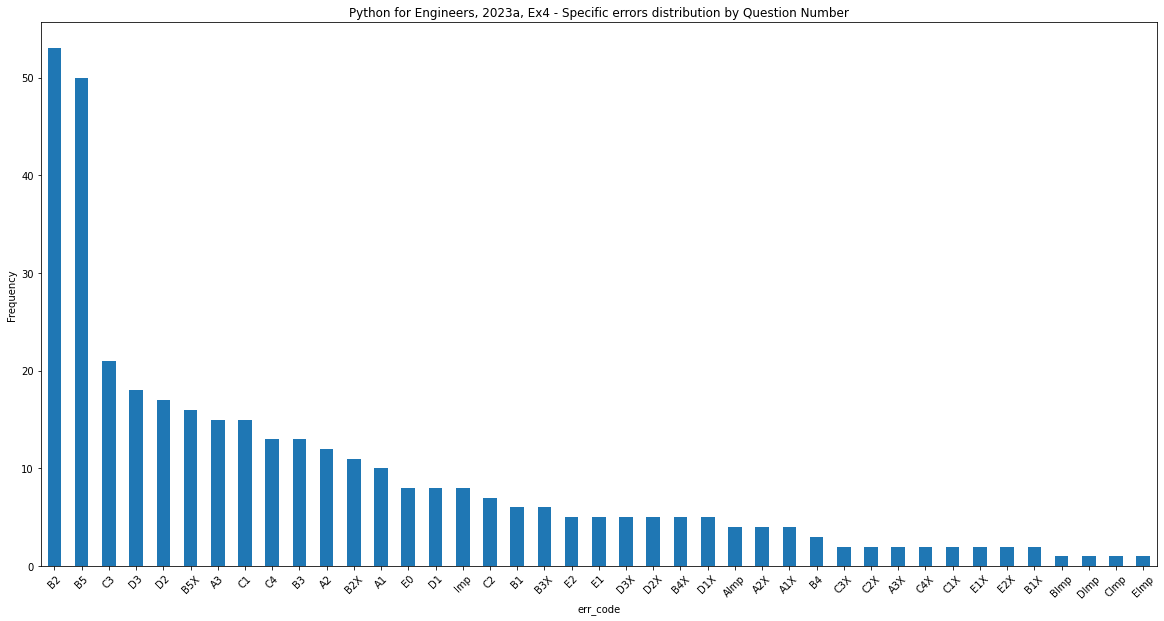

In [17]:
# errs_dist = err_df_longform.err_code.value_counts(normalize=True, sort=True)
errs_dist = err_df_longform.err_code.value_counts(normalize=False, sort=True)
errs_dist.plot(kind='bar', figsize=(20, 10), rot = 45)
plt.xlabel('err_code')
plt.ylabel('Frequency')
plt.title(f'Python for Engineers, {SEMESTER}, Ex{EX_NUM} - Specific errors distribution by Question Number')
plt.savefig(f'{wdir}/ex{EX_NUM}_spec_err_dist.png')

plt.show()

In [18]:
q_errcode = 'B3'
mask = err_df_longform['err_code'].str.contains(rf'{q_errcode}')
# mask = len(re.findall(ptrn, )) > 0
print(err_df_longform.loc[mask]['value'].iloc[0])
print(err_df_longform.loc[mask]['value'].iloc[1])
print(err_df_longform.loc[mask]['value'].iloc[2])
# err_df_longform.loc[(err_df_longform['err_code'] == 'B2L') & (err_df_longform['value'] != "{'Passed'}")]

{'Wrong answer, expected output: [{(1, 1): -1, (2, 2): 1}, {(1, 1): 2, (5, 5): -5, (5, 4): 2}], got: {(1, 1): -2}.'}
{'Wrong answer, expected output: [{(1, 1): -1, (2, 2): 1}, {(1, 1): 2, (5, 5): -5, (5, 4): 2}], got: {(1, 1): -2}.'}
{'Wrong answer, expected output: [{(1, 1): -1, (2, 2): 1}, {(1, 1): 2, (5, 5): -5, (5, 4): 2}], got: {(1, 1): -2}.'}


In [19]:
err_df_longform = err_df_longform.assign(QNum = err_df_longform.err_code.apply(err_to_QNum))

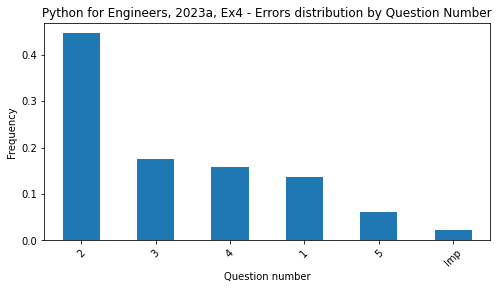

In [20]:
errs_dist = err_df_longform.QNum.value_counts(normalize=True, sort=True)
errs_dist.plot(kind='bar', figsize=(8, 4), rot = 45 )
plt.xlabel('Question number')
plt.ylabel('Frequency')
plt.title(f'Python for Engineers, {SEMESTER}, Ex{EX_NUM} - Errors distribution by Question Number')
plt.savefig(f'{wdir}/ex{EX_NUM}_general_err_dist.png')
plt.show()
print("")

# print(f"*******\n"
#       f"Final Ex{EX_NUM} data: grade distribution is:\n{str(dist)}\n"
#       f"Avg num of errors is: {round(final_df.err_count.mean(), 0)}\n"
#       f"Median num of errors is: {round(final_df.err_count.median(), 0)}\n"
#       f"*******\n")

In [21]:
test = err_df_longform.err_code.apply(lambda x: x.endswith('1R'))
err_df_longform[test]
# mask = f(err_df_longform.err_code)
# err_df_longform[mask]

,stud_id,err_code,value,QNum


## Finalize student grades dataframe and plot summary statistics

In [22]:
def get_final_grade(err_count: float) -> int:
    '''
    COPIED FROM THE general_tester_utils.py
    
    Return a grade according to number of grades
    :param err_count: a float representing number of errors (e.g 15.5)
    :return: an integer representing the final grade according to the grading rules.
    '''
    if err_count <= 1:
        return 100
    elif err_count <= 3.0:
        return 90
    elif err_count <= 10.0:
        return 80
    elif err_count <20.0:
        return 60
    else:
        return 0

In [23]:
def get_err_count(err_codes_str: str)-> float:
    '''
    THIS FUNCTION IS USED AGAIN TO REFACTOR GRADES AT THE FINAL NOTEBOOK, ITS HERE FOR PURPOSE OF CONSERVATION
    Get a string representing all error codes that a student has.
    Count the different types of errors and return the weighted total of errors.
    :param err_codes_str: string representation of error codes, format is a  a comma seprated string representation of
    a list, such assuch as 'A1, D*2, C3' etc.
    :return: float representing the total weighted errors.
    '''
    if(err_codes_str == 'OK'): return 0  # No errors at all
    if len(re.findall(r'\bImp', err_codes_str)) > 0 : return 20 # Total import error, could not check submission

    cum_sum_of_errs = 0

    qnum_err_codes = ['A', 'B', 'C', 'D', 'E', 'G']
    max_err_per_q = 3

    for qnum, q_errcode in enumerate(qnum_err_codes, 1):
        
        # Failed to test the question - e.g AImp - give a weight of 3
        if(len(re.findall(f'{q_errcode}Imp', err_codes_str)) > 0 ):
            cum_sum_of_errs += 3
            continue 
            
        # EX6-7 Where using loops is forbidden 
        if(len(re.findall(rf'[{q_errcode}]0', err_codes_str)) > 0 ):
            cum_sum_of_errs += 3
            continue 
          
        # Take up to <max_err_per_q> per question
        num_of_errs = min(len(re.findall(f'{q_errcode}', err_codes_str)), max_err_per_q)
        

        # Add to cumulative sum of erros so far
        cum_sum_of_errs += num_of_errs 
        
    
    # Find students with a RE flag
    RECHECK_flag = len(re.findall('RE', err_codes_str))

    
    # Calculate final err count
    err_count = cum_sum_of_errs + RECHECK_flag * 4

    return err_count


### Load and merge student df files

In [24]:
stud_df = pd.read_csv(f'{wdir}/ex{EX_NUM}_students_df.csv', index_col = 0)
try:
    stud_df_recheck = pd.read_csv(f'{wdir}/ex{EX_NUM}_recheck_students_df.csv', index_col = 0)
    print("Imported rechecks, rechecks df shape:", stud_df_recheck.shape)
except:
    stud_df_recheck = None
    
students_merged_df = pd.concat([stud_df,stud_df_recheck]).drop_duplicates(['stud_id'],keep='last').sort_values('err_codes')
print("students_merged_df shape:", students_merged_df.shape)

students_merged_df shape: (155, 6)


In [25]:
### Apply grading functions, plot and write out files

In [26]:
students_merged_df = students_merged_df.assign(err_count = students_merged_df.err_codes.apply(lambda  err_list: get_err_count(err_list)))
students_merged_df = students_merged_df.assign(final_grade=students_merged_df.err_count.apply(lambda err_num: get_final_grade(err_num)))


In [27]:
errs_dist

QNum
2      0.446237
3      0.174731
4      0.158602
1      0.137097
5      0.061828
Imp    0.021505
Name: proportion, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'percent_of_total'

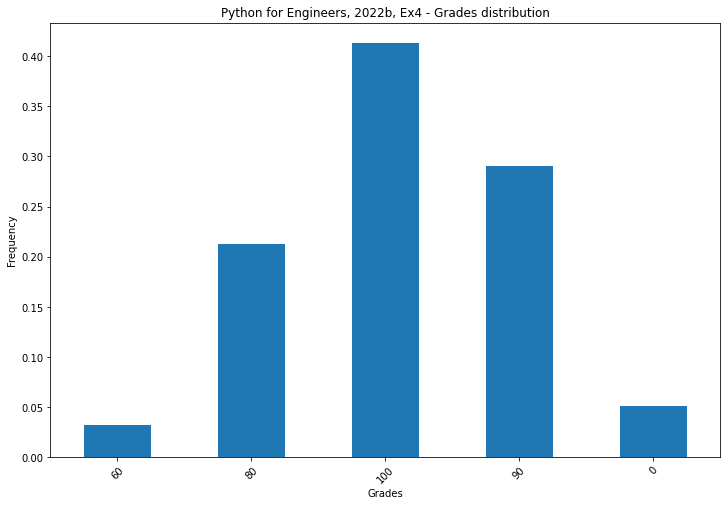

In [28]:
# Reload plotting function
importlib.reload(gen)

# Plot 
# errs_dist = students_merged_df.final_grade.value_counts(normalize=False, sort=False)
# errs_dist.index.name = 'Grade'
# errs_dist.plot(kind='bar', figsize=(12, 8), rot = 45)

plt.xlabel('err_code')
plt.ylabel('Frequency')
plt.title(f'Python for Engineers, 2022a, Ex{EX_NUM} - Grades distribution')
plt.savefig(f'{wdir}/ex{EX_NUM}_grades_dist.png')
gen.plotResults(students_merged_df)
plt.show()

In [29]:
dist_norm = students_merged_df.final_grade.value_counts(normalize=True, sort=False)
dist_quant = students_merged_df.final_grade.value_counts(normalize=False, sort=False)
temp = pd.DataFrame(dist_norm)
temp = temp.assign(num_of_students = dist_quant)
temp.rename({'final_grade':'percent_of_total'}, inplace = True, axis = 1)
temp.percent_of_total = temp.percent_of_total.apply(lambda per: round(per, 3))
temp = temp[['num_of_students', 'percent_of_total']]
print(temp)

AttributeError: 'DataFrame' object has no attribute 'percent_of_total'

In [30]:
problematic_ids_list =  [214390627, 50161280, 209583723, 39909254, 31566466,212212823]
display(students_merged_df.loc[students_merged_df.stud_id.isin(problematic_ids_list)].head(10))

## Write file
students_merged_df.loc[students_merged_df.stud_id.isin(problematic_ids_list)].to_csv(f'{wdir}/ex{EX_NUM}_final_grades_problematic_ids.csv')



,stud_id,stud_name,valid_file_flag,err_codes,err_count,final_grade


### Print students with grade 0 for validation

In [31]:
students_merged_df.loc[students_merged_df.final_grade == 0]

,stud_id,stud_name,valid_file_flag,err_codes,err_count,final_grade
142,209360528,Itamar Rahamim,True,Imp,20,0
31,212965305,Ali Egbaria,True,Imp,20,0
82,325129815,Wajeeh Wattad,True,Imp,20,0
51,206969354,Orpaz Bar,True,Imp,20,0
69,316223148,Ofir Koren,True,Imp,20,0
25,213780638,Siba Aasi,True,Imp,20,0
55,206500860,Dana Attal,True,Imp,20,0
96,212966394,Bayan Mhameed,True,Imp,20,0


# Write out all students with good ids

In [32]:
display(students_merged_df.head(10))

## Write file 
students_merged_df.loc[~students_merged_df.stud_id.isin(problematic_ids_list)].to_csv(f'{wdir}/ex{EX_NUM}_final_grades.csv')




,stud_id,stud_name,valid_file_flag,err_codes,err_count,final_grade
14,316297472,Stav Avnit,True,"A1, A2, A3, B1, B2, B3, B4, B5, C1, C2, C3, C4...",12,60
47,214194847,Daniel Nethanel,True,"A1, A2, A3, B1, B2, B3, B4, B5, D1X, D2X, D3X,...",11,60
62,313581951,Raz Bar-On,True,"A1, A2, A3, B2, B5",5,80
77,212838577,Tamer Mansour,True,"A1, A2, A3, B2, B5",5,80
83,209678382,Daniela Amouyal Agranati,True,"A1, A2, A3, B2, B5, C1, C3, C4, D1, D2, D3, E1...",13,60
99,318791068,Jihad Abu Daya,True,"A1, A2, A3, B2, B5, D1, D2, D3",8,80
16,207266560,Noam Fineberg,True,"A1, A2, A3, B2X, B5X, E0",8,80
133,325562700,Avraham Rozenberg,True,"A1, A2, A3, C1, C2, C3, C4, D1, D2, D3",9,80
138,208940882,Eden Cohen,True,"A1, A2, A3, D1, D2, D3",6,80
17,214296923,Bayan Said Ahmad,True,"A1, A3, B2, B5, D2, D3",6,80


In [33]:
# Load the datasets
err_extended = pd.read_csv(f'/Users/dror/PycharmProjects/PyProg1920Bex{EX_NUM}/outputs/ex{EX_NUM}_err_df_extended.csv', index_col =0).reset_index()
err_extended_recheck = pd.read_csv(f'/Users/dror/PycharmProjects/PyProg1920Bex{EX_NUM}/recheck_outputs/ex{EX_NUM}_err_df_extended.csv').rename({'Unnamed: 0':'stud_id'}, axis = 1)

# Merge the two of them
err_df_ex_merged = err_extended.append(err_extended_recheck, sort=True).drop_duplicates(['stud_id'],keep='last')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dror/PycharmProjects/PyProg1920Bex4/outputs/ex4_err_df_extended.csv'

In [34]:
# The err_df_extended only contains id's of students that had errors, 
# so first it has to be merged with the regular df stud_id column so it will have all the students ID's in it.
err_df_ex_merged.merge(err_df_merged.stud_id, how = 'outer')


NameError: name 'err_df_ex_merged' is not defined

In [35]:
# The err_extended contains column names like E2L, E2Exp etc, melt them all into 1 column for code error
err_df_ex_merged.rename(columns=lambda col_name: col_name[:2], inplace=True)

# Melt columns with same name that resulted from the lambda above
err_df_ex_merged = pd.concat([err_df_ex_merged,err_df_ex_merged])

# Replace nan's (No error in question) with 'OK', and sort 
err_df_ex_merged = err_df_ex_merged.fillna('OK').sort_index(axis = 1).set_index('in').reset_index().rename({'in':'stud_id'}, axis = 1)

# Write final err_extended_csv
err_df_ex_merged.to_csv(f'{wdir}/ex{EX_NUM}_err_df_extended.csv')



NameError: name 'err_df_ex_merged' is not defined

## Excercises grading funcs

### Ex3

In [36]:
def get_err_count(err_codes_str: str)-> float:
    '''
    THIS FUNCTION IS USED AGAIN TO REFACTOR GRADES AT THE FINAL NOTEBOOK, ITS HERE FOR PURPOSE OF CONSERVATION
    Get a string representing all error codes that a student has.
    Count the different types of errors and return the weighted total of errors.
    :param err_codes_str: string representation of error codes, format is a  a comma seprated string representation of
    a list, such assuch as 'A1, D*2, C3' etc.
    :return: float representing the total weighted errors.
    '''
    if(err_codes_str == 'OK'): return 0 
    cum_sum_of_errs = 0
    
    B6_flag = len(re.findall('B6', err_codes_str)) > 0

    qnum_err_codes = ['A', 'B', 'C', 'D', 'E', 'F']
    for qnum, q_errcode in enumerate(qnum_err_codes, 1):
        # Failed to test the question - e.g AImp - give a weight of 3
        if(len(re.findall(f'{q_errcode}Imp', err_codes_str)) > 0 ):
            cum_sum_of_errs += 3
            continue 
        
        
        # Take up to <max_err_per_q> per question
        max_err_per_q = 3
        num_of_errs = min(len(re.findall(f'{q_errcode}', err_codes_str)), max_err_per_q)
        
        if(qnum == 2) and B6_flag:
            num_of_errs += 1
#             print('** ' + str(num_of_errs))
        
        # Add to cumulative sum of erros so far
        cum_sum_of_errs += num_of_errs 
        
    # Find students with a total Imp flag
    imp_flag = len(re.findall(r'\bImp', err_codes_str))
    
    # Find students with a RE flag
    RECHECK_flag = len(re.findall('RE', err_codes_str))

    
    # Calculate final err count
    err_count =  imp_flag * 15 + cum_sum_of_errs + RECHECK_flag * 6

    return err_count

## EX7

In [37]:
def get_err_count(err_codes_str: str)-> float:
    '''
    THIS FUNCTION IS USED AGAIN TO REFACTOR GRADES AT THE FINAL NOTEBOOK, ITS HERE FOR PURPOSE OF CONSERVATION
    Get a string representing all error codes that a student has.
    Count the different types of errors and return the weighted total of errors.
    :param err_codes_str: string representation of error codes, format is a  a comma seprated string representation of
    a list, such assuch as 'A1, D*2, C3' etc.
    :return: float representing the total weighted errors.
    '''
    if(err_codes_str == 'OK'): return 0 
    cum_sum_of_errs = 0

    qnum_err_codes = ['A', 'B', 'C', 'D', 'E', 'G']
    max_err_per_q = 3

    for qnum, q_errcode in enumerate(qnum_err_codes, 1):
        
        # Failed to test the question - e.g AImp - give a weight of 3
        if(len(re.findall(f'{q_errcode}Imp', err_codes_str)) > 0 ):
            cum_sum_of_errs += 3
            continue 
          
        # Take up to <max_err_per_q> per question
        num_of_errs = min(len(re.findall(f'{q_errcode}', err_codes_str)), max_err_per_q)
        
        if q_errcode in ['B', 'G'] and num_of_errs > 0:
            num_of_errs+=1

        # Add to cumulative sum of erros so far
        cum_sum_of_errs += num_of_errs 
        
    # Find students with a total Imp flag
    imp_flag = len(re.findall(r'\bImp', err_codes_str))
    
    # Find students with a RE flag
    RECHECK_flag = len(re.findall('RE', err_codes_str))

    
    # Calculate final err count
    err_count =  imp_flag * 15 + cum_sum_of_errs + RECHECK_flag * 6

    return err_count
